<div style="text-align: center;">
  <h1>TA136 - Taller de Procesamiento de Señales</h1>
  <h2>Trabajo Práctico 6: Árboles de Decisión</h2>
</div>

---
---

<div style="text-align: center;">
  <h3> Introducción
</div>

&ensp; El presente trabajo práctico tiene como objetivo clasificar el productor de vino a partir del análisis químico del producto, utilizando la base de datos *Wine* provista por la librería `sklearn`. Para ello, se implementan y comparan diferentes modelos de clasificación: árboles de decisión (con y sin poda) y bosques aleatorios, formados por múltiples árboles.

&ensp; En el caso de los árboles aleatorios, se visualizas los gráficos obtenidos a fin de analizar las diferencias entre la versión completa y la podada. Además, se analiza las *Feature Importances* de cada una de las características que componen a los árboles y se realiza la predicción de un análisis químico dado por las consignas.

&ensp; Por otro lado, se desarrolla una implementació del modelo de *Random Forest* desde cero, permitiendo así entender en mayor profundidad el algoritmo en sí. En este caso también se realiza la clasificación del análisis químico mencionado previamente.

&ensp; Todo esto se llevó a cabo en $\texttt{Python}$, utilizando bibliotecas como `Sklearn`, `Numpy` y `Matplotlib`.

---
---

<div style="text-align: center;">
  <h3> Desarrollo
</div>

**Tres productores de vino, de la misma región de Italia, sometieron su producto a un análisis químico. Se desea clasificar el productor correspondiente a partir del análisis mencionado.**

---

#### (A). *Exploración de Datos:*

**Cargar la base de datos utilizando $\texttt{load\_wine}$ (`sklearn`).**

&ensp; En un principio, se carga el conjunto de datos *Wine* utilizando la función recomendada por la cátedra. Se especifica el parámetro `as_frame` como `True` para obtener los datos en un *dataFrame* de la librería `pandas`. Luego, se agrega una columna `clase` con los valores numéricos de las clases (0, 1, 2). Una vez realizado esto, se imprimen $10$ muestras aleatorias de la tabla, con el objetivo de mostrar los datos y analizar que se hayan cargado correctamente.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk

In [ ]:
dataset = sk.datasets.load_wine(as_frame = True)

df = dataset['data']
df['clase'] = dataset['target']

display(df.sample(10))

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,clase
25,13.05,2.05,3.22,25.0,124.0,2.63,2.68,0.47,1.92,3.58,1.13,3.20,830.0,0
144,12.25,3.88,2.20,18.5,112.0,1.38,0.78,0.29,1.14,8.21,0.65,2.00,855.0,2
85,12.67,0.98,2.24,18.0,99.0,2.20,1.94,0.30,1.46,2.62,1.23,3.16,450.0,1
125,12.07,2.16,2.17,21.0,85.0,2.60,2.65,0.37,1.35,2.76,0.86,3.28,378.0,1
159,13.48,1.67,2.64,22.5,89.0,2.60,1.10,0.52,2.29,11.75,0.57,1.78,620.0,2
72,13.49,1.66,2.24,24.0,87.0,1.88,1.84,0.27,1.03,3.74,0.98,2.78,472.0,1
95,12.47,1.52,2.20,19.0,162.0,2.50,2.27,0.32,3.28,2.60,1.16,2.63,937.0,1
132,12.81,2.31,2.40,24.0,98.0,1.15,1.09,0.27,0.83,5.70,0.66,1.36,560.0,2
68,13.34,0.94,2.36,17.0,110.0,2.53,1.30,0.55,0.42,3.17,1.02,1.93,750.0,1
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2


&ensp; En base al *dataframe* creado anteriormente, se verifica que la dimensión de las características según cada clase sea de $59$, $71$ y $48$, es decir, que la dimensión total sea de $178 \times 14$, ya que, es lo que está específicado por la función $\texttt{load\_wine}$.

In [ ]:
display(df['clase'].value_counts().sort_index())

clase
0    59
1    71
2    48
Name: count, dtype: int64

---

#### (B). *Árbol de Decisión:*

- **Utilizando el comando $\texttt{tree.DecisionTreeClassifier}$ (`sklearn`), entrenar un clasificador con entropía como función de impureza.**

&ensp; A partir del *dataframe* cargado previamente, se define la matriz $X$ con los análisis químicos de cada vino y el vector $y$ con los productores, es decir, las clases. Además, se comprueba que tengan las dimensiones esperadas.

In [ ]:
X_data = np.array(df.iloc[:, 0:13])
Y_data = np.array(df['clase'])

display(X_data.shape)
display(Y_data.shape)

(178, 13)

(178,)

&ensp; Entonces, se procede a inicializar y entrenar un árbol de decisión utilizando la función recomendada por la cátedra: $\texttt{DecisionTreeClassifier}$, perteneciente a la biblioteca sklearn. El único parámetro especificado durante la inicialización es la función de impureza, que en este caso corresponde a la entropía, cuya expresión se detalla a continuación.

$$H(Q_m) = \sum_k -p_{m, ~ k} \log_2 (p_{m, ~k});$$

donde $p_{m, ~k}$ es la proporción de muestras de la clase $k$ en el nodo $m$.

In [ ]:
arbol = sk.tree.DecisionTreeClassifier(criterion = 'entropy')
arbol.fit(X_data, Y_data)

DecisionTreeClassifier(criterion='entropy')

- **Utilizando $\texttt{plot\_tree}$ (`sklearn`) graficar el diagrama de  árbol. Indicar la cantidad de nodos y hojas.**

&ensp; Una vez entrenado el árbol, haciendo uso de la función $\texttt{plot\_tree}$, se lo grafica.

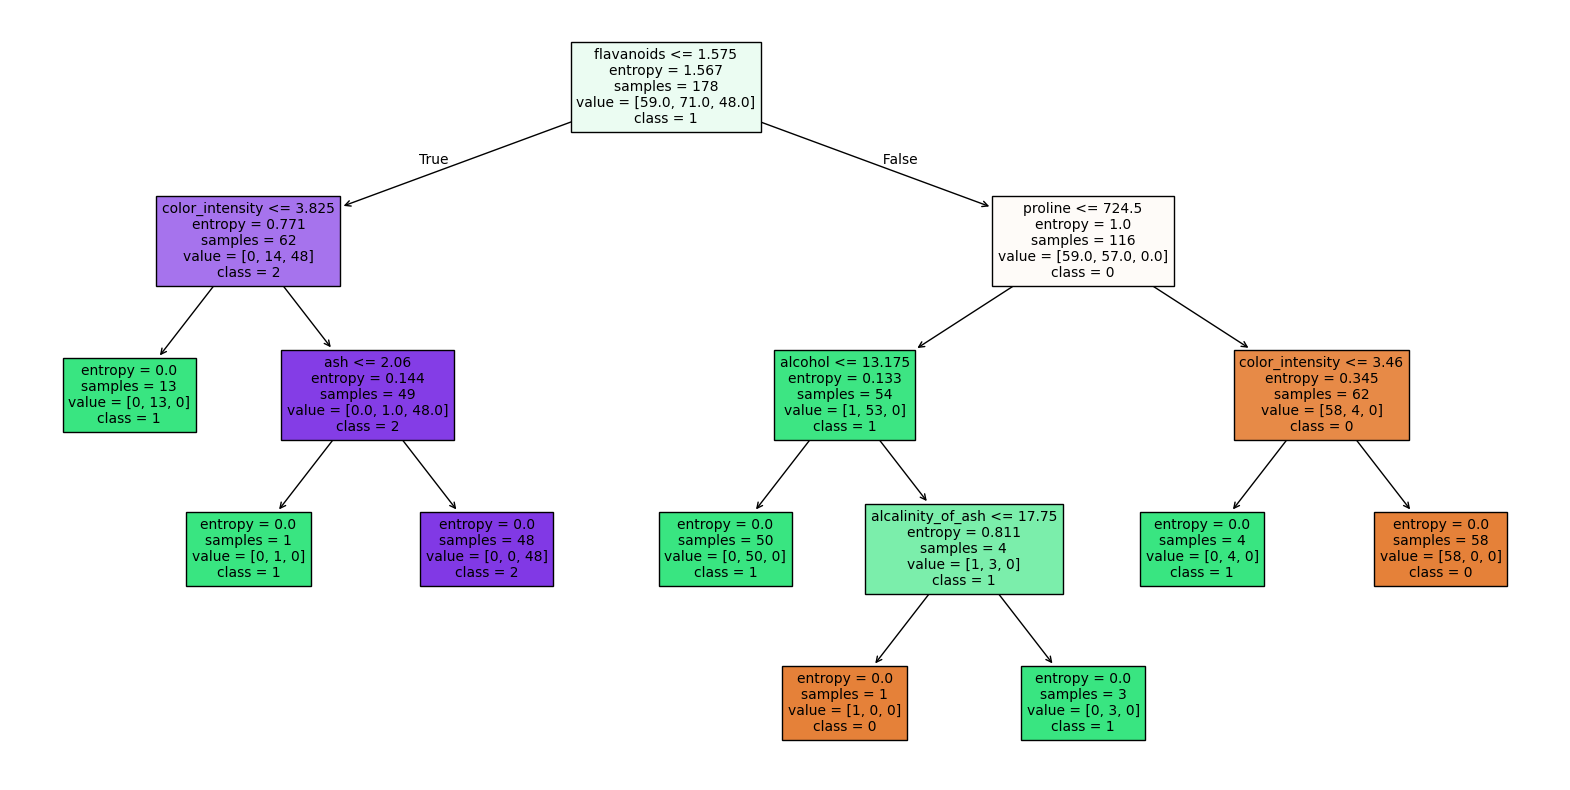

In [ ]:
plt.figure(figsize = (20, 10))
sk.tree.plot_tree(arbol, filled = True, fontsize = 10, feature_names = df.columns[0:13], class_names = ['0', '1', '2'])
plt.show()

&ensp; Antes de contar la cantidad de nodos y hojas, se definen brevemente los siguientes conceptos:

- **Nodo raíz:** es el punto de partida del árbol de decisión, donde se evalúa una característica del problema para empezar a dividir los datos. A partir de este, se generan las distintas ramas del árbol.

- **Nodos internos:** son los puntos en los que se evalúan condiciones sobre el set de datos. Según el resultado, se sigue por una u otra rama.

- **Nodos hoja:** son los nodos que no tienen hijos, representan el resultado final del proceso de decisión. En este caso, indica a qué clase pertenece una muestra.

&ensp; A partir de lo que se observa en la figura anterior, se concluye que el árbol de decisión cuenta con $6$ nodos internos y $8$ hojas. Además, se identifica claramente que el nodo con la condición `flavanoids <= 1.575` es el nodo raíz. Por lo tanto, se concluye que el árbol tiene un total de $15$ nodos. Esto se verifica a continuación.

In [ ]:
nodos = arbol.tree_.node_count
hojas = arbol.tree_.n_leaves

print(f'Cantidad de nodos: {nodos}')
print(f'Cantidad de hojas: {hojas}')

Cantidad de nodos: 15
Cantidad de hojas: 8


- **Encontrar los 3 *features* más relevantes según la *Feature Importance*.**

&ensp; La *Feature Importance* indica la importancia relativa de cada característica para reducir la impureza al construir el árbol, es decir, mide cuánto ayuda cada *feature* a separar las muestras de cada nodo. A mayor altura en el árbol, mayor *Feature Importance*, por lo tanto, el nodo raíz es el que posee la característica más importante.

&ensp; El cálculo de este atributo se realiza a partir de la siguiente ecuación:

$$\Delta_m = H(Q_m) - \left( \frac{|Q_m^L|}{|Q_m|} \cdot H(Q_m^L) + \frac{|Q_m^R|}{|Q_m|} \cdot H(Q_m^R) \right);$$

donde $Q_m$ es el conjunto de datos en el nodo $m$ y $H(Q_m)$ es la función de impureza, en este caso, si se les agregan $L$ o $R$ se refiere a los parámetros de los nodos hijos a izquierda o a derecha, respectivamente.

&ensp; Cabe destacar que a la hora de realizar esto, la librería `sklearn` normaliza cada valor obtenido con la sumatoria de todos con el objetivo de que la sumatoria total sea igual a uno.

In [ ]:
def plot_feature_importance(tree, color):
  feature_importance = tree.feature_importances_
  plt.figure(figsize = (10, 6))
  plt.barh(df.columns[0:13], feature_importance, align = 'center', zorder = 2, color = color)
  plt.xlabel('Feature Importance')
  plt.ylabel('Features')
  plt.title('Feature Importance del Árbol de Decisión')
  plt.xticks([0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45])
  plt.grid(axis = 'x', zorder = 1)
  plt.show()
  return feature_importance

&ensp; De esta manera, se utiliza la función desarrollada anteriormente para graficar e imprimir la *Feature Importance* de cada una de las características del análisis químico y se verifica que en total sumen $1$, pues esto indica que están normalizadas.

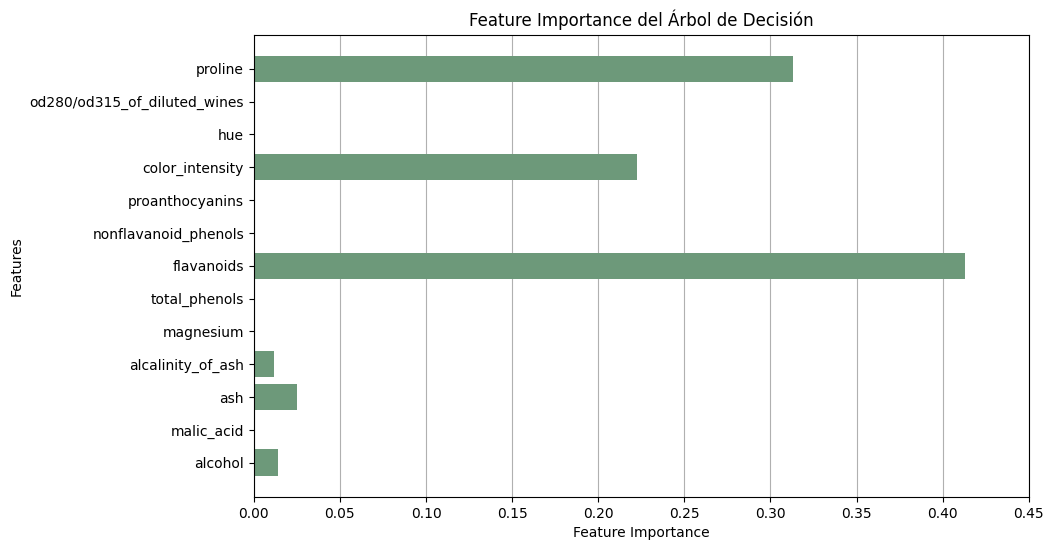

Feature importance flavanoids: 0.41
Feature importance proline: 0.31
Feature importance color_intensity: 0.22
Sumatoria de los resultados del feature importance : 1.0


In [ ]:
feature_imp = plot_feature_importance(arbol, '#6d997a')
orden_feature_imp = np.sort(feature_imp)[::-1]

print(f'Feature importance flavanoids: {orden_feature_imp[0]:.2f}')
print(f'Feature importance proline: {orden_feature_imp[1]:.2f}')
print(f'Feature importance color_intensity: {orden_feature_imp[2]:.2f}')
print(f'Sumatoria de los resultados del feature importance : {sum(feature_imp)}')

- **Clasificar el siguiente análisis químico:**

$$ \left[ 13.0, ~ 2.33, ~ 2.37, ~ 19.5, ~ 99.7, ~ 2.29, ~ 2.03, ~ 0.36, ~ 1.59, ~ 5.06, ~ 0.96, ~ 2.61, ~ 747 \right]$$

&ensp; A fin de realizar este apartado del ejercicio, se declara un *array* con los valores del análisis y se utiliza el método $\texttt{predict}$ para clasificarlo.

In [ ]:
analisis = np.array([13.0, 2.33, 2.37, 19.5, 99.7, 2.29, 2.03, 0.36, 1.59, 5.06, 0.96, 2.61, 747]).reshape(1, -1)

clasificacion = arbol.predict(analisis)[0]
print(f'Clasificación del análisis: {clasificacion}')

Clasificación del análisis: 0


---

#### (C). *Podado:*

**Repetir el inciso (B) para un árbol podado con una complejidad $\alpha = 0.05$. Calcular el costo-complejidad asociado.**

&ensp; Se sigue el mismo procedimiento que en el inciso anterior: se inicializa el árbol de decisión incluyendo un parámetro correspondiente a la poda ($\alpha = 0.05$), luego se entrena y finalmente se grafica.

In [ ]:
alpha = 0.05
arbol_podado = sk.tree.DecisionTreeClassifier(criterion = 'entropy', ccp_alpha = alpha)
arbol_podado.fit(X_data, Y_data)

DecisionTreeClassifier(ccp_alpha=0.05, criterion='entropy')

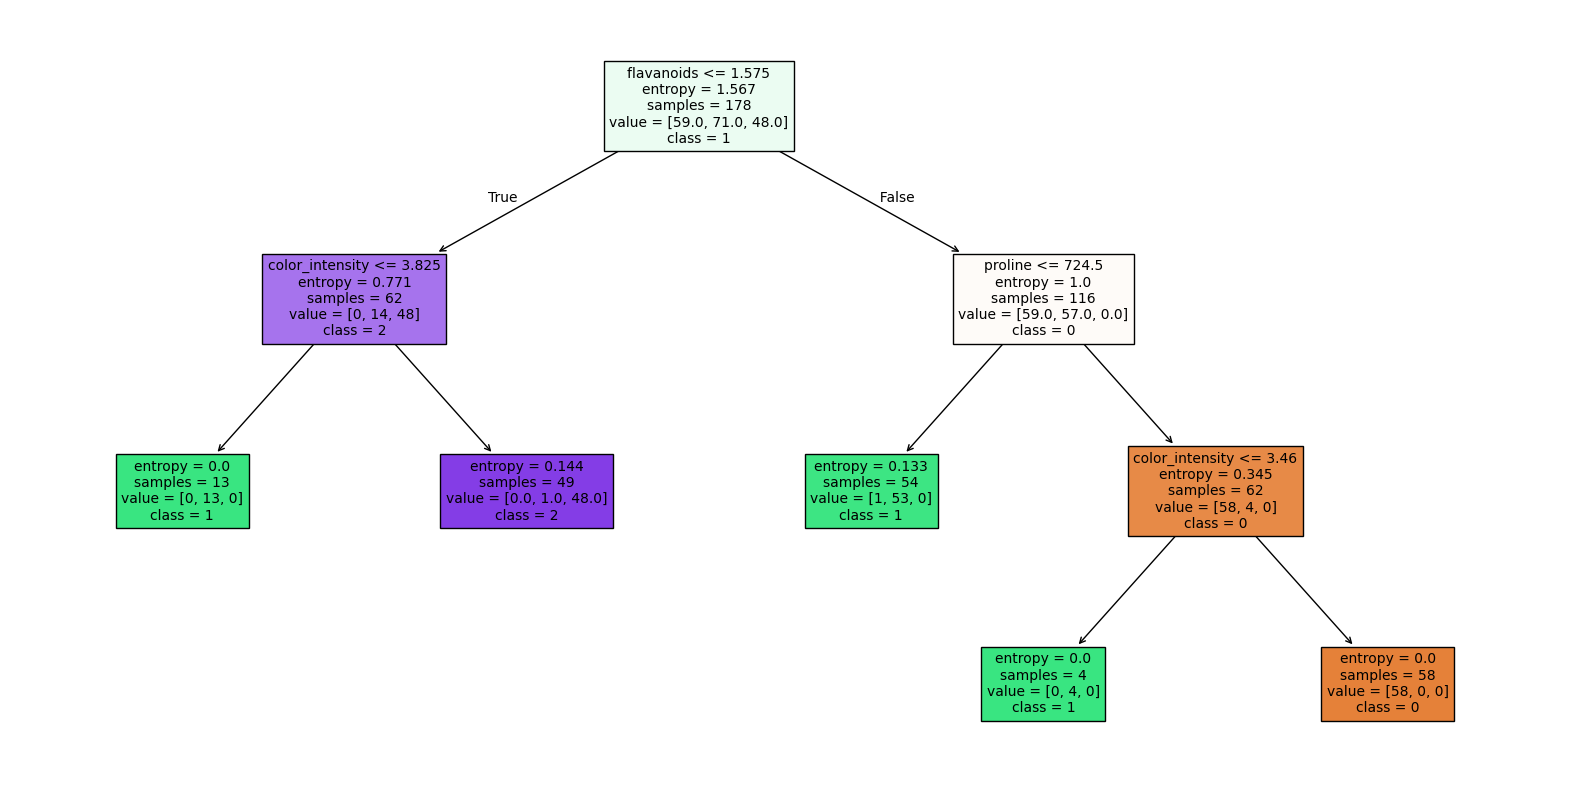

In [ ]:
plt.figure(figsize = (20, 10))
sk.tree.plot_tree(arbol_podado, filled = True, fontsize = 10, feature_names = df.columns[0:13], class_names = ['0', '1', '2'])
plt.show()

&ensp; Al comparar este diagrama con el obtenido anteriormente, se observa que el número de nodos disminuyó debido a la poda aplicada mediante el parámetro $\alpha$ indicado en la consigna. Como resultado, el árbol podado presenta $3$ nodos internos y $5$ hojas, manteniendo el mismo nodo raíz que el árbol sin podar. En total, el árbol cuenta con $9$ nodos, como se verifica en el siguiente *script*.

In [ ]:
nodos_podado = arbol_podado.tree_.node_count
hojas_podado = arbol_podado.tree_.n_leaves

print(f'Cantidad de nodos: {nodos_podado}')
print(f'Cantidad de hojas: {hojas_podado}')

Cantidad de nodos: 9
Cantidad de hojas: 5


&ensp; Por otro lado, se utiliza la función $\texttt{plot\_feature\_importance}$ implementada anteriormente, a fin de analizar la *Feature Importance* de cada característica en particular y verificar que en total sumen a $1$.  

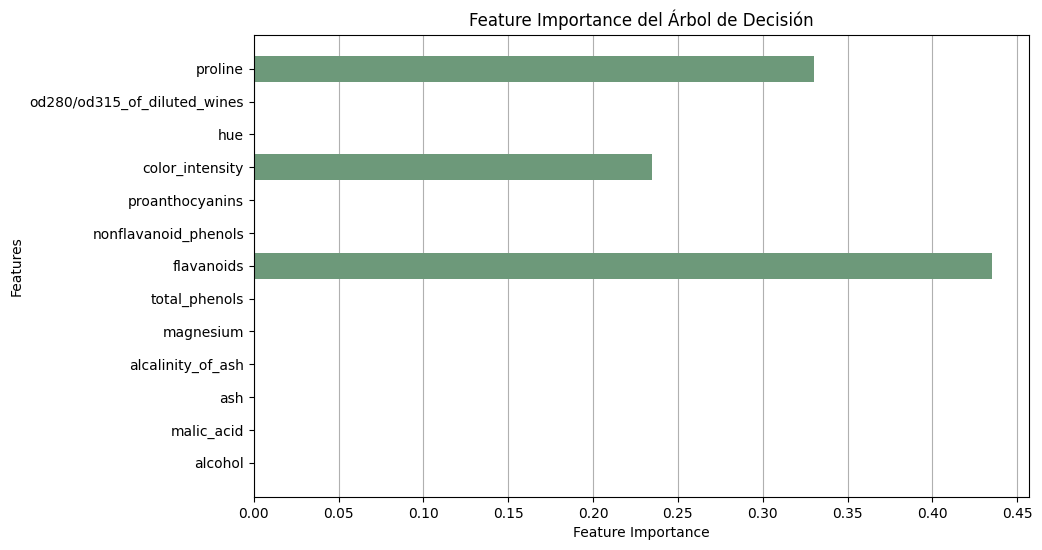

Feature importance flavanoids: 0.44
Feature importance proline: 0.33
Feature importance color_intensity: 0.23
Sumatoria de los resultados del feature importance : 1.0


In [ ]:
feature_imp_poda = plot_feature_importance(arbol_podado, '#6d997a')
orden_feature_imp_poda = np.sort(feature_imp_poda)[::-1]

print(f'Feature importance flavanoids: {orden_feature_imp_poda[0]:.2f}')
print(f'Feature importance proline: {orden_feature_imp_poda[1]:.2f}')
print(f'Feature importance color_intensity: {orden_feature_imp_poda[2]:.2f}')
print(f'Sumatoria de los resultados del feature importance : {sum(feature_imp_poda)}')

&ensp; Análogamente a lo ya realizado, se utiliza el método $\texttt{predict}$ con el modelo del árbol podado para clasificar el análisis químico.

In [ ]:
clasificacion_analisis_podado = arbol_podado.predict(analisis)[0]
print(f'Clasificación del análisis con árbol podado: {clasificacion_analisis_podado}')

Clasificación del análisis con árbol podado: 0


&ensp; Ahora, se procede a calcular el costo computacional de la poda, el cual está dado por la siguiente expresión:

$$H_\alpha (T) = \sum_{m ~ \in ~ L(T)} \frac{|Q_m|}{n} \cdot H(Q_m) + \alpha \cdot |L(T)|;$$

donde $T$ es un árbol determinado, $L(T)$ su respectivo conjunto de hojas, $Q_m$ el conjunto de datos en cada nodo $m$ del árbol $T$, $n$ la cantidad total de datos, $\alpha = 0.05$ el parámetro de complejidad y $H(Q_m)$ la función de impureza, en este caso, la entropía definida anteriormente.

In [ ]:
n = X_data.shape[0]
nodos_hoja = arbol_podado.tree_.n_node_samples[arbol_podado.tree_.children_left == -1]
impurity_hoja = arbol_podado.tree_.impurity[arbol_podado.tree_.children_left == -1]

cost_complexity = np.sum(nodos_hoja * impurity_hoja) / n + alpha * hojas_podado
print(f'Costo de complejidad: {cost_complexity:.2f}')


Costo de complejidad: 0.33


---

#### (D). *Bosques Aleatorios:*

**Implementar un bosque aleatorio de 30 árboles (sin poda) con entropía como función de impureza. Puede utilizar el comando $\texttt{tree.DecisionTreeClassifier}$ (`sklearn`), pero la combinación de estos árboles debe ser implementación propia. El código debe estar estructurado de la siguiente manera:**


```python
class RandomForest:

  # Inicializar atributos y declarar hiperpar ́ametros
  def __init__(self,...

  # Etapa de entrenamiento
  def fit(self, X, y):

  # Etapa de testeo hard
  def predict(self, X):
```

**Clasificar el análisis químico del inciso (B).**

&ensp; Un bosque aleatorio consiste en hacer uso del método *Bagging* a partir de lo realizado con los árboles de decisión. La idea es entrenar muchos árboles distintos y tomar la decisión final por mayoria o promedio. Esto ayuda a contrarrestar el *overfitting*, que es un problema común en los *decission tree*.

&ensp; Para lograr que cada árbol sea diferente, se aplican las siguientes técnicas:

- *Bootstraping*, que consiste en tomar $n$ muestras al azar con reposición del conjunto de entrenamiento, permitiendo que algunas muestras se repitan.

- Cada árbol que se entrena, lo hace a partir de un subconjunto aleatorio de *features*, esto quiere decir que no se utilizan todas las columnas para entrenar el árbol, sino que una parte de ellas. En este caso, si $d_x$ es la cantidad total de *features*, se usan $\sqrt{d_x}$.

&ensp; Así, se implementó la clase `RandomForest`, que sigue la idea básica de un bosque aleatorio. A continuación se explican qué hace cada método.

- `__init__:` Inicializa la clase y define los atributos del modelo. En particular, almacena el número de árboles en el bosque (`n_trees`) y los árboles que se obtienen en el entrenamieto (`trees`).

- `fit:` Ajusta el modelo a los datos de entrenamiento siguiendo los pasos:
    1. Se generan aleatoriamente los índices que se utilizan en cada iteración para realizar el *Bootstrap*.

    2. En cada iteración, se inicializan y se entrenan los árboles con los índices dados por el punto anterior y con la raíz de la cantidad total de las *features*, según el parámetro `max_features = 'srqt'`.

    3. Se guarda cada árbol entrenado en la lista llamada `tree`.

- `prediction:` Realiza predicciones para nuevos datos una vez que el modelo ha sido entrenado. Cada árbol genera su propia predicción y luego se elige la clase que más veces fue predicha, es decir, la decisión final se toma por mayoría.

In [ ]:
class RandomForest:
    # Inicializar atributos y declarar hiperparámetros
    def __init__(self, n_trees = 0):
        self.n_trees = n_trees
        self.trees = None

    # Etapa de entrenamiento
    def fit(self, X, y):
        n_data = X.shape[0]

        indice_filas = np.random.randint(0, n_data, size = (self.n_trees, n_data))
        self.trees = []
        for i in range(self.n_trees):
            tree = sk.tree.DecisionTreeClassifier(criterion = 'entropy', max_features = 'sqrt')
            tree.fit(X[indice_filas[i], :], y)
            self.trees.append(tree)

    # Etapa de testeo hard
    def prediction(self, X):
        predicts = np.array([tree.predict(X) for tree in self.trees])
        mayoria = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis = 0, arr = predicts)
        return mayoria

&ensp; Una vez implementada la clase, se la inicializa y se la entrena con la cantidad de árboles solicitados por la cátedra.

In [ ]:
bosque = RandomForest(n_trees = 30)
bosque.fit(X_data, Y_data)

&ensp; Por último, se realiza la predicción del análisis químico.

In [ ]:
prediccion = bosque.prediction(analisis)[0]
print(f'Clasificación del análisis con bosque aleatorio: {prediccion}')

Clasificación del análisis con bosque aleatorio: 0


---
---

<div style="text-align: center;">
  <h3> Conclusiones
</div>

&ensp; A lo largo del presente trabajo práctico se implementaron y compararon distintos métodos de clasificación de los productores de vino según su análisis químico. Esto se desarrolló a partir del conjunto de datos *Wine* de `sklearn`.

&ensp; En primer lugar, en base a la clase $\texttt{DecisionTreeClassifier}$ de la librería `sklearn`, se inicializaron y entrenaron los árboles de decisión con y sin poda. Posteriormente, ambos se utilizaron para clasificar un análisis químico dado por la cátedra y obtener las *Features* más importantes en cada caso.

&ensp; Entre las principales diferencias observadas entre ambos modelos, se destaca cómo la poda con un parámetro de $\alpha = 0.05$ disminuye significativamente la cantidad de nodos en el árbol. Además, se puede ver claramente que al podar el árbol de decisión, las tres características con mayor relevancia según el *Feature Importance* siguen siendo utilizadas para dividir el árbol de decisión, mientras que, las que tienen un menor aporte como `alcohol` o `alcalinity_of_ash` son descartadas. De esta manera, se evitan las divisiones innecesarias que llevan a que el modelo este sobre entrenado.

Por último, se desarrolló una implementación propia de un bosque aleatorio mediante la clase RandomForest. En esta, se consideró tanto la selección aleatoria de $\sqrt{d_x}$ features en cada división como el uso de bootstraping para seleccionar $n$ muestras con reposición. Este enfoque permitió generar árboles diversos y entrenarlos de forma independiente. La clasificación de la muestra dada arrojó resultados que pueden coincidir o diferir levemente respecto a los modelos anteriores, dependiendo de la aleatoriedad en la selección de datos y variables

&ensp; Por último, se desarrolló la implementación propia de un bosque aleatorio mediante la clase `RandomForest`. En esta, se tuvo en cuenta tanto la selección aleatoria de $\sqrt{d_x}$ *features* como el *Bootstrap*, a fin de elegir $n$ muestras con reposición. Esto permitió generar árboles diversos y entrenarlos de forma independiente. A partir de la clasificación de la muestra dada, se obtuvieron resultados que coinciden o difieren respecto de los obtenidos anteriormente, esto es una muestra de la aleatoriedad del bosque.